# Homework 04

[Chia-Chun Chao]

In [1]:
#################### PLEASE DO NOT MODIFY THIS CELL #####################
import sys, os, string
import math, random
import csv, json
from collections import Counter
# Please do not use other imports in this homework.

def correlation_coefficient(X,Y):
    """Compute the pearson correlation coefficient between two lists of
    numbers X and Y.
    """
    # Please do not modify this function
    
    from numpy import corrcoef
    return float(corrcoef(X,Y)[0,1])

##########################################################################

# Problem 1 - Data acquisition and summarization

#### 1. Create a function `load_data()` that reads the given dataset into Python. Describe how to use this function in a docstring and make sure the code is clear and concise. (Choosing an appropriate data structure here will make the rest of the assignment must easier.)

In [2]:
def load_data(filename):
    """
    Read given dataset from input filename, and return a list of data.
    Each item in the list contains a dictionary mapping each column to its value. 
    """
    allList = []
    
    #Read all lines in the file
    for line in open(filename):
        dataDict = json.loads(line.strip()) #Read json style data into a dictionary
        allList.append(dataDict)

    return allList

In [3]:
def load_key(filename):
    """
    Read given input filename, and return a list of names of all columns.
    """
    keyList = []
    
    #Read all lines in the file
    for line in open(filename):
        #Split line by '=' and store the key into the list if this line is about a key
        splitLine = line.strip().split("=") 
        if len(splitLine) == 2:
            keyList.append(splitLine[0].strip())
                
    return keyList

In [4]:
#Read data into lists
allList = load_data("data/diabetes_study_rz03__data.txt")
keyList = load_key("data/diabetes_study_rz03__key.txt")

dataNum = len(allList)

for key in keyList:
    print(key.ljust(7), end='')
print("\n======================================================")
for data in allList[:10]:
    for key in keyList:
        print((str(data[key])).ljust(7), end='')
    print()

NP     PG     SI     BP     SFT    BMI    age    class  
6      148    0      72     35     33.6   50     1      
1      85     0      66     29     26.6   31     0      
8      183    0      64     0      23.3   32     1      
1      89     94     66     23     28.1   21     0      
0      137    168    40     35     43.1   33     1      
5      116    0      74     0      25.6   30     0      
3      78     88     50     32     31.0   26     1      
10     115    0      0      0      35.3   29     0      
2      197    543    70     45     30.5   53     1      
4      110    0      92     0      37.6   30     0      


#### 2\. Provide summary statistics (as you see fit) in tables for this dataset, describing all the columns and what you may or may not understand about them. The "key" file is useful here as well.

In [5]:
def convertListToDict(dataList):
    """
    Convert input data list of dictionary and return a dictionary mapping a key to a list of values.
    """ 
    #Initialize the dictionary to store values of each key
    allValuesOfKeyDict = {}
    for key in keyList:
        allValuesOfKeyDict[key] = []

    #Store values of each key in the dictionary
    for data in dataList:
        for key in keyList:
            allValuesOfKeyDict[key].append(data[key])
            
    return allValuesOfKeyDict

In [6]:
def print_table(listToPrint):
    """
    Print maximum, minimum, and average of each key in a formatted way.
    """
    for key in keyList:
        print(key.ljust(14), end='')
    print("\n============================================================================================================")    
    for key in range(len(keyList)):
        print(("Max: "+str(listToPrint[key][0])).ljust(14), end='')
    print()    
    for key in range(len(keyList)):
        print(("Min: "+str(listToPrint[key][1])).ljust(14), end='')
    print()    
    for key in range(len(keyList)):
        print(("Ave: "+"{:.3f}".format(listToPrint[key][2])).ljust(14), end='')
    print()

In [7]:
def statistics(dataList):
    """
    Process input list, summarize the data, and print the summary in a formatted way.
    """
    #Convert the original list of dictionaries to a dictionary mapping keys to values
    allValuesOfKeyDict = convertListToDict(dataList) 

    summaryList=[]
    #Summarize data
    for key in keyList:
        #summaryList.append(summary(key, allValuesOfKeyDict[key]))
        summaryList.append([max(allValuesOfKeyDict[key]), min(allValuesOfKeyDict[key]), sum(allValuesOfKeyDict[key])/len(allValuesOfKeyDict[key])])

    #Print data
    print_table(summaryList)    
    
statistics(allList)

NP            PG            SI            BP            SFT           BMI           age           class         
Max: 17       Max: 199      Max: 846      Max: 122      Max: 99       Max: 67.1     Max: 81       Max: 1        
Min: 0        Min: 0        Min: 0        Min: 0        Min: 0        Min: 0.0      Min: 21       Min: 0        
Ave: 3.864    Ave: 120.781  Ave: 79.748   Ave: 68.889   Ave: 20.459   Ave: 32.021   Ave: 33.128   Ave: 0.349    


### Summary Statistics

##### NP = count number of times pregnant
In all observations, there is at least one person that has been pregnant for 17 times, and at least one person that has not been pregnant. These two values are possible in reality. The average number of times being pregnant is 3.86.
##### PG = plasma (blood) glucose level (mg/dL)
The maximum value of plasma glucose level is 199, and the minimum is 0. Zero is an abnormal value here, so there might be some observations containing missing PG value and this missing value is presented as 0. Also, the average value is 120.78
##### SI = serum insulin (also known as fasting insulin)  (micro units per millilter)
The maximum value is 846, and the minimum is 0. Zero is an abnormal value here, so there might be some observations containing missing SI value and this missing value is presented as 0. Also, the average is 79.75.
##### BP = blood pressure (mm Hg)
The maximum value is 122, and the minimum is 0. Zero is an abnormal value here, so there might be some observations containing missing BP value and this missing value is presented as 0. Also, the average is 68.89.
##### SFT = skin fold thickness at tricep (mm)
The maximum value is 99, and the minimum is 0. Zero is an abnormal value here, so there might be some observations containing missing SFT value and this missing value is presented as 0. Also, the average is 20.46.
##### BMI = body mass index (kg/m^2)
The maximum value is 67.1, and the minimum is 0. Zero is an abnormal value here, so there might be some observations containing missing BMI value and this missing value is presented as 0. Also, the average is 32.02.
##### age = subject age (years)
The maximum value is 81, and the minimum is 21. These two values are possible in reality. Also, the average is 33.13.
##### class = has diabetes
The class is a binary number, so 1 means this person suffers from diabetes, and 0 means this person does not. The average 0.35 means 35% of observations suffer from this disease.

# Problem 2 - Missing data detection

#### 1\. Find all the missing data, as best as possible given the information available about the data. Report on how many observations are missing for each variable. Create a function `flag_missing_values()` which reads in the original dataset and returns a copy delineating each missing entry with a Python None variable.

In [8]:
missingNumDict = {} #Store the total number of observations that are missing for each key
for data in allList:   
    for key in keyList[1:6]: #Only SI, SFT, BP, BMI, and PG have missing data
        if data[key] == 0: #Zero is an abnormal value for this key
            try:
                missingNumDict[key] += 1
            except KeyError:
                missingNumDict[key] = 1
#Add these three keys to the dictionary for printing
missingNumDict["NP"] = 0
missingNumDict["age"] = 0
missingNumDict["class"] = 0

print("The number of observations that are missing for each variable:")
for key in keyList:
    print(key, ":", missingNumDict[key])

The number of observations that are missing for each variable:
NP : 0
PG : 5
SI : 363
BP : 35
SFT : 222
BMI : 10
age : 0
class : 0


In [9]:
def flag_missing_values(originalList):
    """
    Read in the original dataset and return a copy delineating each missing entry with a Python None variable.
    """            
    newList = []  
    for data in originalList:
        newDict = {} #Declare a new dictionary for every observation
        newDict[keyList[0]] = data[keyList[0]] #NP
        for key in keyList[1:6]: #We need to take care of PG, SI, BP, SFT, and BMI and change 0 to None
            if data[key] == 0:
                newDict[key] = None
            else:
                newDict[key] = data[key]
        newDict[keyList[6]] = data[keyList[6]] #age
        newDict[keyList[7]] = data[keyList[7]] #class
        
        newList.append(newDict)
        
    return newList

In [10]:
dataWithNoneList = flag_missing_values(allList) #Replace missing value with None

for key in keyList:
    print(key.ljust(7), end='')
print("\n======================================================")
for data in dataWithNoneList[:10]:
    for key in keyList:
        print((str(data[key])).ljust(7), end='')
    print()

NP     PG     SI     BP     SFT    BMI    age    class  
6      148    None   72     35     33.6   50     1      
1      85     None   66     29     26.6   31     0      
8      183    None   64     None   23.3   32     1      
1      89     94     66     23     28.1   21     0      
0      137    168    40     35     43.1   33     1      
5      116    None   74     None   25.6   30     0      
3      78     88     50     32     31.0   26     1      
10     115    None   None   None   35.3   29     0      
2      197    543    70     45     30.5   53     1      
4      110    None   92     None   37.6   30     0      


#### 2\. Create a function `listwise_deletion()` that reads in the "flagged" dataset (created by f`lag_missing_values()`), and returns a copy sanitized via the listwise deletion method. Report summary statistics (as in Problem 1) on this dataset and, specifically, contrast it with the full dataset (what is similar, what is different, etc.). Report the (Pearson) correlation coefficient between each pair of variables on the sanitized dataset.



In [11]:
def listwise_deletion(originalList):
    """
    Read in the "flagged" dataset, and return a copy sanitized via the listwise deletion method.
    """
    newList = []   
    for data in originalList:
        flag = 0 #Set flag to 1 if there is missing value in this observation
        for key in keyList[1:6]: #Only determine if PG, SI, BP, SFT, or BMI is None
            if data[key] == None:
                flag = 1
        if flag == 0: #PG, SI, BP, SFT, and BMI all contain a normal value
            newList.append(data)
            
    return newList

In [12]:
sanitizedList = listwise_deletion(dataWithNoneList)

print("Originally, there are", dataNum, "observations.")
statistics(allList)
print("\n\nAfter sanitizing, there are", len(sanitizedList), "observations.")
statistics(sanitizedList)

Originally, there are 750 observations.
NP            PG            SI            BP            SFT           BMI           age           class         
Max: 17       Max: 199      Max: 846      Max: 122      Max: 99       Max: 67.1     Max: 81       Max: 1        
Min: 0        Min: 0        Min: 0        Min: 0        Min: 0        Min: 0.0      Min: 21       Min: 0        
Ave: 3.864    Ave: 120.781  Ave: 79.748   Ave: 68.889   Ave: 20.459   Ave: 32.021   Ave: 33.128   Ave: 0.349    


After sanitizing, there are 385 observations.
NP            PG            SI            BP            SFT           BMI           age           class         
Max: 17       Max: 198      Max: 846      Max: 110      Max: 63       Max: 67.1     Max: 81       Max: 1        
Min: 0        Min: 56       Min: 14       Min: 24       Min: 7        Min: 18.2     Min: 21       Min: 0        
Ave: 3.317    Ave: 122.416  Ave: 155.062  Ave: 70.587   Ave: 29.047   Ave: 33.028   Ave: 30.821   Ave: 0.332    


If PG, SI, BP, SFT, or BMI of an observation is 0, we consider it as a missing observation and delete it. Therefore, minimum values of PG, SI, BP, SFT, and BMI are changed and greater than zero. Because there are only 385 of 750 observations left after sanitizing, maximum and average values of all variables are also changed. The most obvious change is average of SI and SFT, because there are 363 and 222 observations missing for SI and SFT separately, which is much more than other variables. 

In [13]:
def report_correlation_coefficient(dictOfList):
    """
    Print the (Pearson) correlation coefficient between each pair of variables on the input dataset.
    This input is a dictionary mapping key to a list containing values of that key.
    """
    
    print(" ".ljust(8), end='')
    for key in keyList:
        print(key.ljust(13), end='')
    print("\n============================================================================================================") 

    for firstKey in keyList:
        print(firstKey.ljust(8), end='')
        for secondKey in keyList:
            coefficient = correlation_coefficient(dictOfList[firstKey], dictOfList[secondKey])
            print("{:.7f}".format(coefficient).ljust(13), end='')
        print()

In [14]:
#Store sanitized data in a dictionary mapping keys to all values of that key
sanitizedDict = convertListToDict(sanitizedList)

#Report the (Pearson) correlation coefficient between each pair of variables on the sanitized dataset.
print("Pearson correlation coefficient:\n")
report_correlation_coefficient(sanitizedDict)


Pearson correlation coefficient:

        NP           PG           SI           BP           SFT          BMI          age          class        
NP      1.0000000    0.1991175    0.0783720    0.2146695    0.0967713    -0.0213151   0.6842593    0.2637977    
PG      0.1991175    1.0000000    0.5743983    0.2134669    0.1989230    0.2166627    0.3468056    0.5276593    
SI      0.0783720    0.5743983    1.0000000    0.1024614    0.1769354    0.2300585    0.2301330    0.3255046    
BP      0.2146695    0.2134669    0.1024614    1.0000000    0.2294524    0.3029086    0.3026023    0.2006892    
SFT     0.0967713    0.1989230    0.1769354    0.2294524    1.0000000    0.6617861    0.1705158    0.2655869    
BMI     -0.0213151   0.2166627    0.2300585    0.3029086    0.6617861    1.0000000    0.0737500    0.2820272    
age     0.6842593    0.3468056    0.2301330    0.3026023    0.1705158    0.0737500    1.0000000    0.3511862    
class   0.2637977    0.5276593    0.3255046    0.2006892    0.

# Problem 3 - Missing data imputation

#### 1. Perform marginal mean imputation on the missing values for each observation. Make scatterplots for each pair of variables showing their associations and use different colors/symbols to highlight the imputed values compared with the original (plt.subplots() may be helpful for dealing with large numbers of plots). Interpret this method of imputation. Report the Pearson correlation coefficient between variable pairs in the imputed dataset, and compare with the correlation coefficients measured in Problem 2.2.

##### a. Perform marginal mean imputation on the missing values for each observation.

In [15]:
#################### PLEASE DO NOT MODIFY THIS CELL #####################
import matplotlib.pyplot as plt
##########################################################################

In [16]:
def marginal_mean_imputation(originalList, meanDict):
    """
    Read in the original dataset, replace missing values with mean of non-missing values, and return the new list.
    """            
    newList = []  
    for data in originalList:
        newDict = {} #Declare a new dictionary for every observation
        newDict[keyList[0]] = data[keyList[0]] #NP
        for key in keyList[1:6]: #We need to take care of PG, SI, BP, SFT, and BMI and change 0 to None
            if data[key] == None:
                newDict[key] = meanDict[key]
            else:
                newDict[key] = data[key]
        newDict[keyList[6]] = data[keyList[6]] #age
        newDict[keyList[7]] = data[keyList[7]] #class
        
        newList.append(newDict)
        
    return newList

In [17]:
#Initialize a dictionary mapping keys to a list of non-missing values of that key
nonMissingDictOfList = {}
for key in keyList:
    nonMissingDictOfList[key] = []
    
for data in dataWithNoneList:
    for key in keyList:
        if data[key] != None: #Only keep non-missing values
            nonMissingDictOfList[key].append(data[key])

#Find the mean of non-missing values
meanDict = {}
for key in keyList:
    meanDict[key] = sum(nonMissingDictOfList[key])/len(nonMissingDictOfList[key])

#Marginal mean imputation replaces missing values with mean of non-missing values
imputationList = marginal_mean_imputation(dataWithNoneList, meanDict)


print("Mean of non-missing values of each valuable:")
for key in meanDict:
    print(key, ':', meanDict[key])
print()

print("Data after replacing missing value with None:")
for key in keyList:
    print(key.ljust(8), end='')
print("\n=============================================================")
for data in dataWithNoneList[:5]:
    for key in keyList:
        print((str(data[key])).ljust(8), end='')
    print()
print()

print("Data after performing marginal mean imputation:")
for key in keyList:
    print(key.ljust(8), end='')
print("\n=============================================================")      
for data in imputationList[:5]:
    for key in keyList:
        if type(data[key]) == float:
            print(("{:.1f}".format(data[key])).ljust(8), end='')
        else:
            print((str(data[key])).ljust(8), end='')
    print()

Mean of non-missing values of each valuable:
NP : 3.864
PG : 121.59194630872483
SI : 154.5503875968992
BP : 72.26153846153846
SFT : 29.060606060606062
BMI : 32.45391891891891
age : 33.128
class : 0.34933333333333333

Data after replacing missing value with None:
NP      PG      SI      BP      SFT     BMI     age     class   
6       148     None    72      35      33.6    50      1       
1       85      None    66      29      26.6    31      0       
8       183     None    64      None    23.3    32      1       
1       89      94      66      23      28.1    21      0       
0       137     168     40      35      43.1    33      1       

Data after performing marginal mean imputation:
NP      PG      SI      BP      SFT     BMI     age     class   
6       148     154.6   72      35      33.6    50      1       
1       85      154.6   66      29      26.6    31      0       
8       183     154.6   64      29.1    23.3    32      1       
1       89      94      66      23    

##### b. Make scatterplots for each pair of variables showing their associations and use different colors/symbols to highlight the imputed values compared with the original (plt.subplots() may be helpful for dealing with large numbers of plots). Interpret this method of imputation. 

Marginal mean imputation replaces missing values with mean of non-missing values. Scatterplot shows that imputed values mostly form a line because these values are replaced with the same mean value.

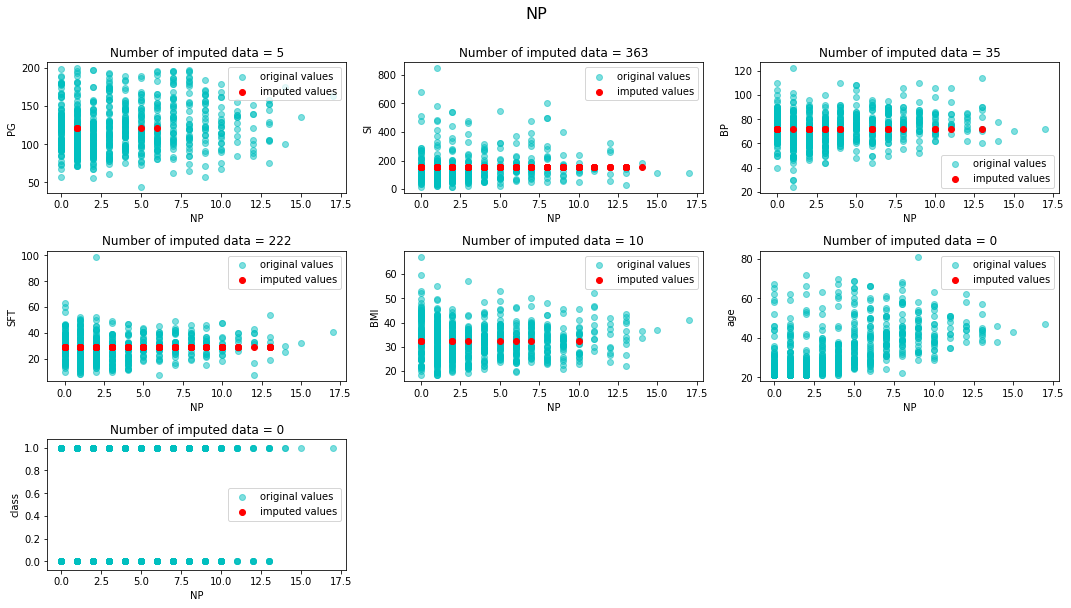

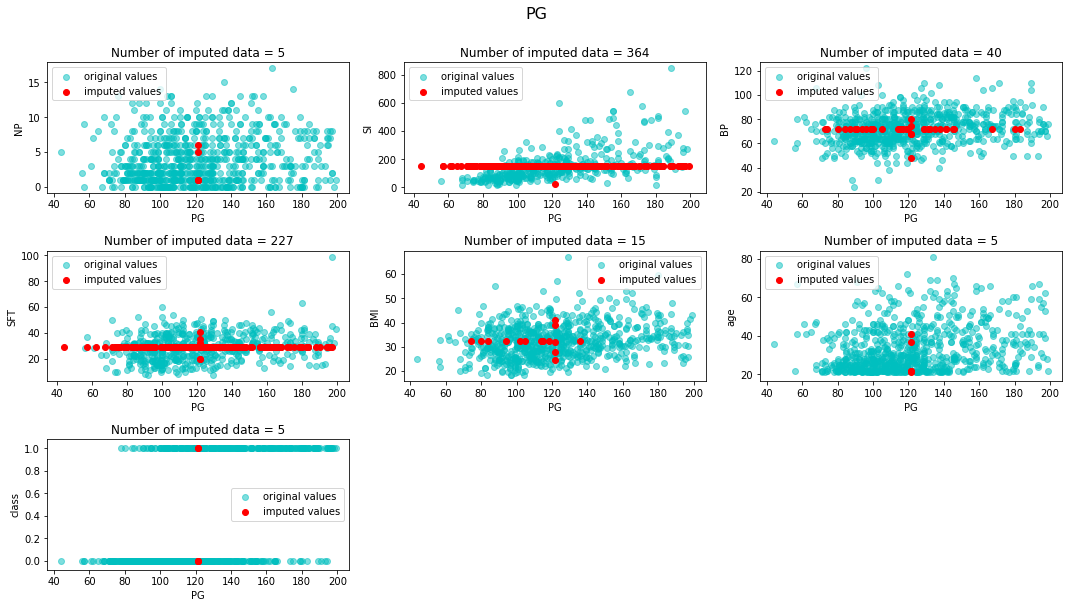

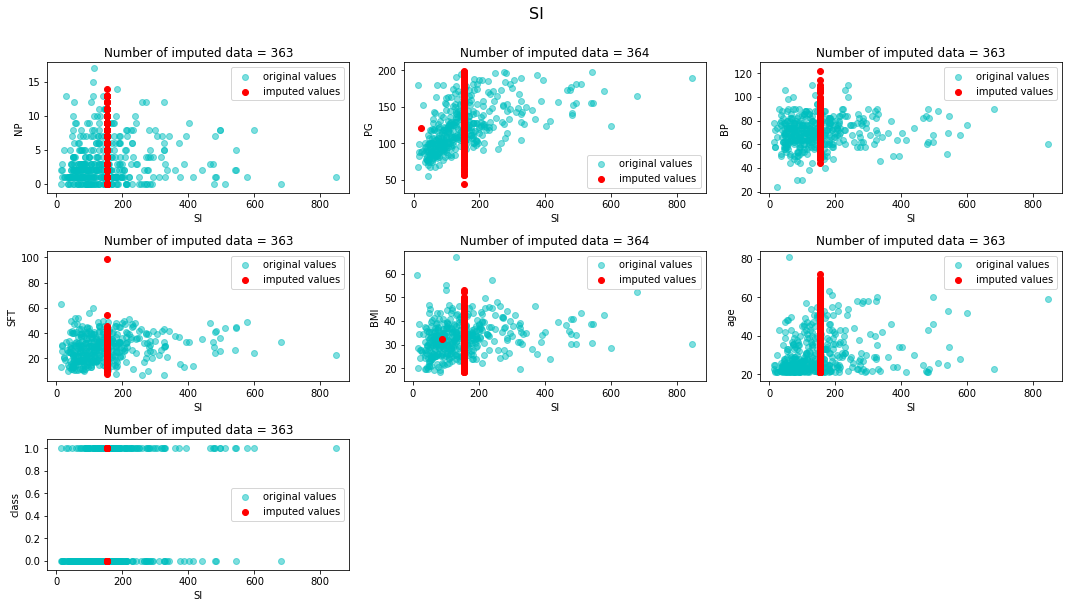

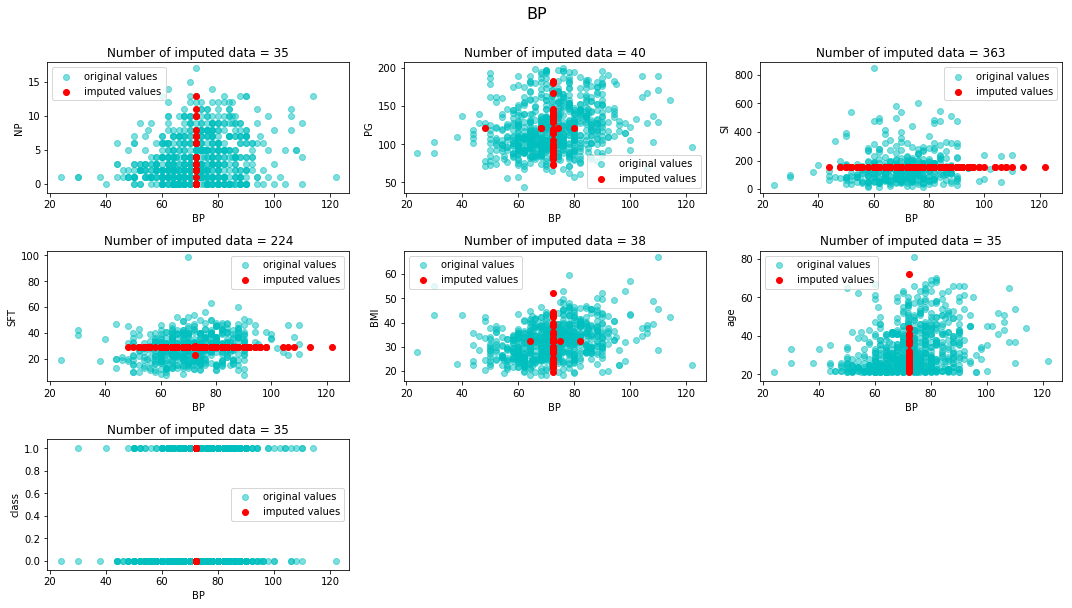

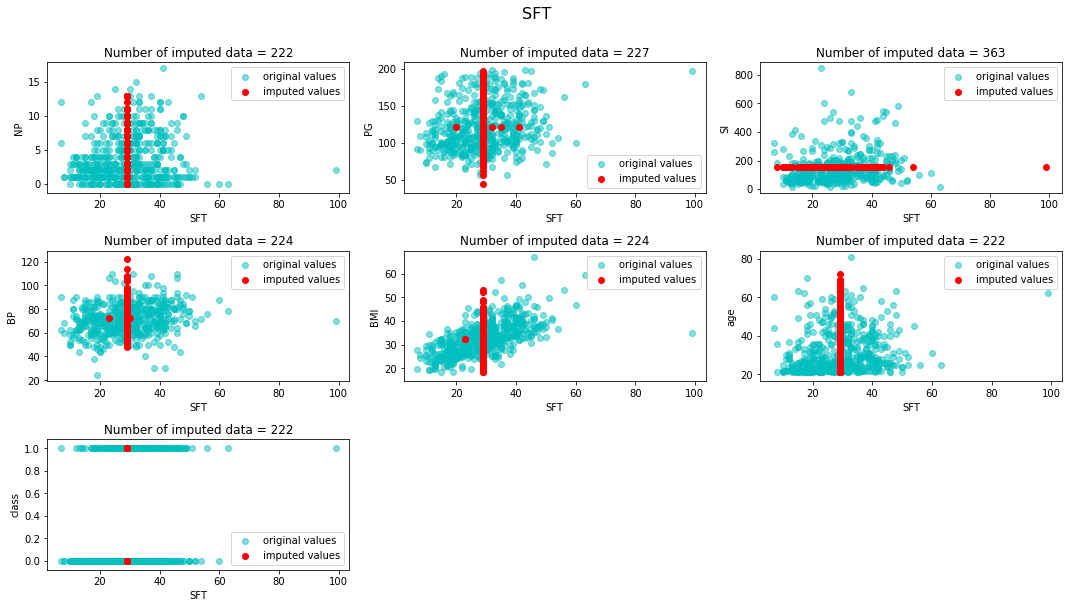

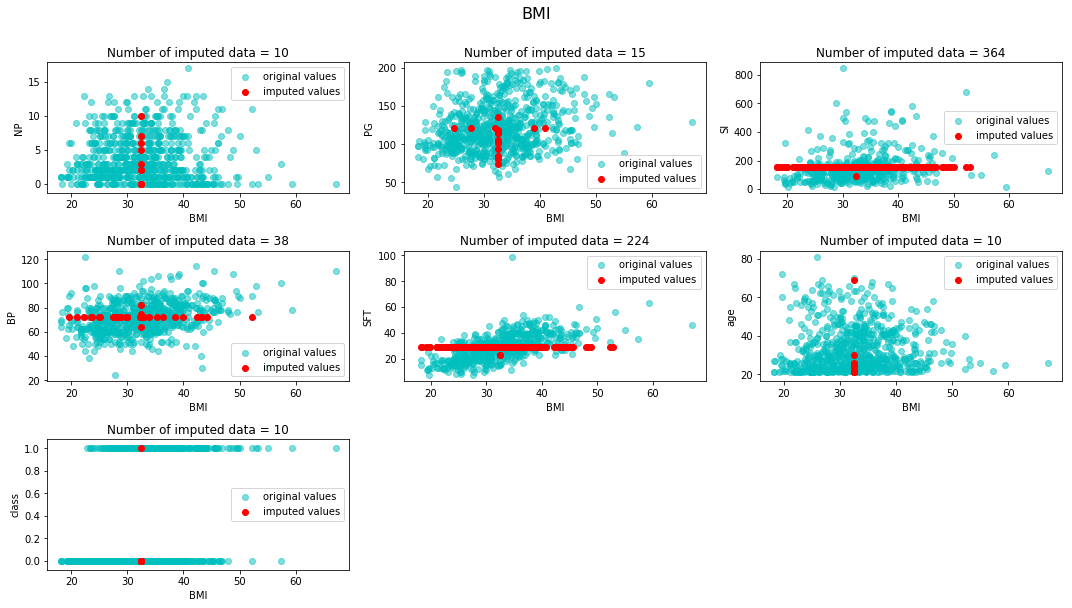

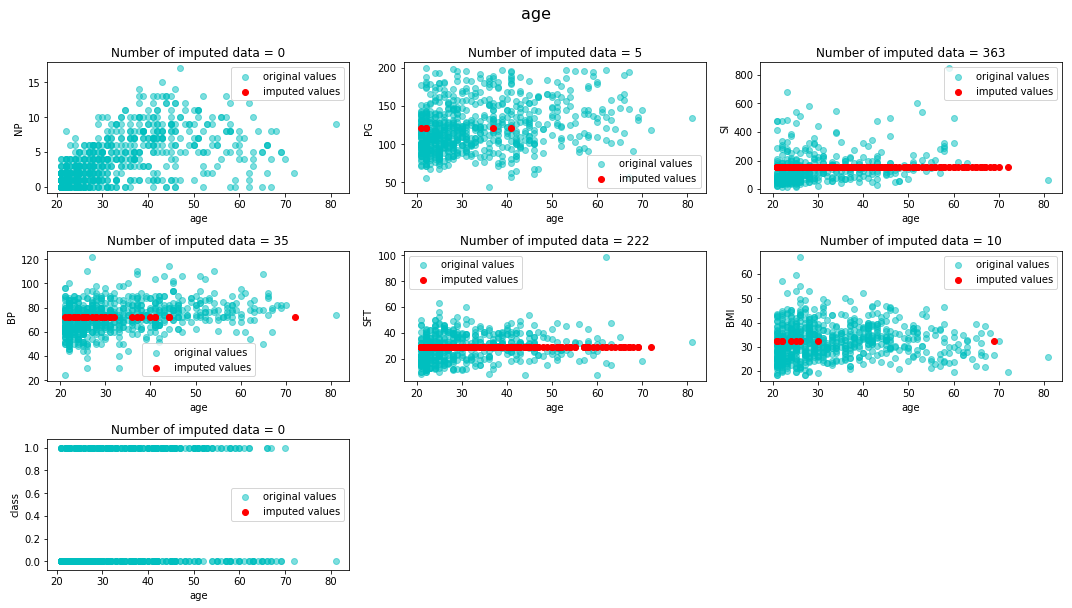

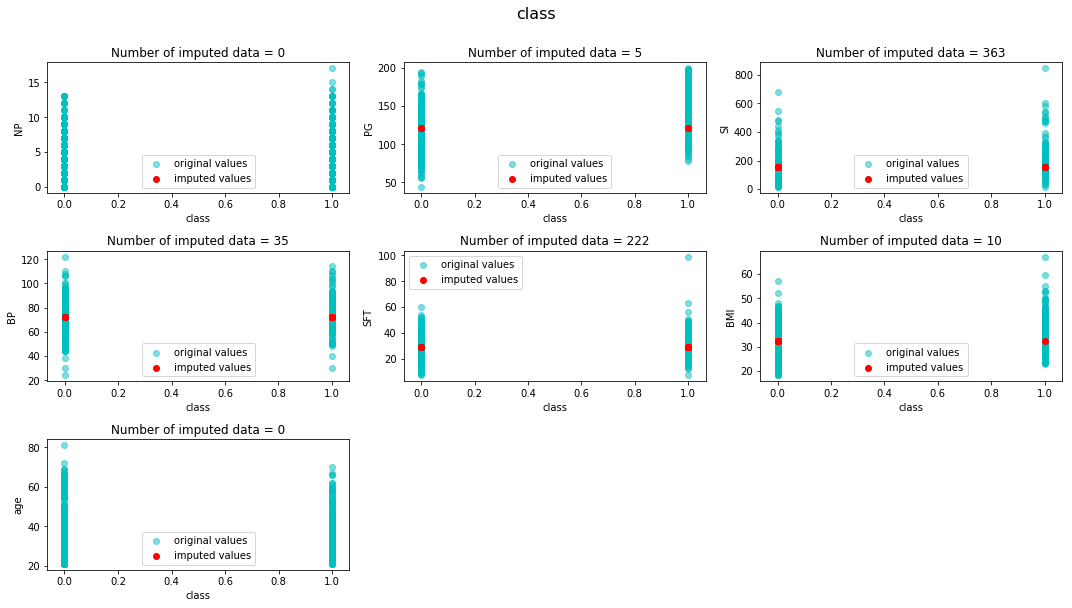

In [18]:
xList = [] #Store all values of this key in a list for x axis
yList = [] #Store all values of this key in a list for y axis
missingXList = [] #Store all values of this key if this value or the second value is missing
missingYList = [] #Store all values of this key if this value or the first value is missing


for firstKey in keyList:     
    fig, axes = plt.subplots(figsize=(15,8), nrows=3, ncols=3,sharex=False, sharey=False)
    fig.suptitle(firstKey, fontsize=16, y=1.05)
    
    i=0
    for secondKey in keyList:
        if firstKey == secondKey:#Don't need to compare itself
            continue
        
        for dataIndex in range(len(dataWithNoneList)):
            #Find all imputed values of this pair of variables
            if dataWithNoneList[dataIndex][firstKey] == None or dataWithNoneList[dataIndex][secondKey] == None:
                missingXList.append(imputationList[dataIndex][firstKey])
                missingYList.append(imputationList[dataIndex][secondKey])
            #Original values without missing values
            else:
                xList.append(imputationList[dataIndex][firstKey])
                yList.append(imputationList[dataIndex][secondKey])
 
        #Make scatterplots for each pair of variables
        axes[int(i/3),i%3].scatter(xList, yList, color='c', alpha=0.5, label="original values")
        axes[int(i/3),i%3].scatter(missingXList, missingYList, color='r', label="imputed values")
        axes[int(i/3),i%3].set_xlabel(firstKey)
        axes[int(i/3),i%3].set_ylabel(secondKey)
        axes[int(i/3),i%3].set_title("Number of imputed data = "+str(len(missingXList)))
        axes[int(i/3),i%3].legend()
        
        #Clear all list
        missingXList.clear()
        missingYList.clear()
        xList.clear()
        yList.clear()
        
        i+=1
    #End of for loop
    
    fig.delaxes(axes[-1,-1]) #Delete axes[2,2]
    fig.delaxes(axes[-1,-2]) #Delete axes[2,1]
    plt.tight_layout() #Separate two plots
    plt.show()

##### c. Report the Pearson correlation coefficient between variable pairs in the imputed dataset, and compare with the correlation coefficients measured in Problem 2.2.

In [19]:
#Report the (Pearson) correlation coefficient between each pair of variables on the sanitized dataset.
print("Pearson correlation coefficient of data sanitized by listwise deletion:\n")
report_correlation_coefficient(sanitizedDict)

#Store sanitized data in a dictionary mapping keys to all values of that key
imputationDict = convertListToDict(imputationList)

#Report the (Pearson) correlation coefficient between each pair of variables on the imputed dataset.
print("\n\nPearson correlation coefficient of data imputed by marginal mean imputation:\n")
report_correlation_coefficient(imputationDict)

Pearson correlation coefficient of data sanitized by listwise deletion:

        NP           PG           SI           BP           SFT          BMI          age          class        
NP      1.0000000    0.1991175    0.0783720    0.2146695    0.0967713    -0.0213151   0.6842593    0.2637977    
PG      0.1991175    1.0000000    0.5743983    0.2134669    0.1989230    0.2166627    0.3468056    0.5276593    
SI      0.0783720    0.5743983    1.0000000    0.1024614    0.1769354    0.2300585    0.2301330    0.3255046    
BP      0.2146695    0.2134669    0.1024614    1.0000000    0.2294524    0.3029086    0.3026023    0.2006892    
SFT     0.0967713    0.1989230    0.1769354    0.2294524    1.0000000    0.6617861    0.1705158    0.2655869    
BMI     -0.0213151   0.2166627    0.2300585    0.3029086    0.6617861    1.0000000    0.0737500    0.2820272    
age     0.6842593    0.3468056    0.2301330    0.3026023    0.1705158    0.0737500    1.0000000    0.3511862    
class   0.2637977    0.

#### 2\. (Bonus for undergraduates; required for graduate students) An important aspect of missing data is patterns in the missingness. Perform an analysis, statistical, visual, etc. to see if the presence or absence of a variable having a missing value is associated with the values of other variables that are not missing. Can you conclude if the data are MCAR(Missing Completely At Random)?

In [20]:
#Initialize a dictionary storing dictionaries of each key, and each inner dictionary stores a number
missingRelationDict = {}
for key in keyList:
    missingRelationDict[key] = {}
    for relationKey in keyList:
        missingRelationDict[key][relationKey] = 0

for data in dataWithNoneList:
    for firstKey in keyList:
        if data[firstKey] == None:
            for secondKey in keyList:
                if data[secondKey] == None:
                    missingRelationDict[firstKey][secondKey] += 1

#Print the number of missing values of each variable that occur when a variable is missing
print(" ".ljust(8), end='')
for key in keyList[1:6]:
    print(key.ljust(8), end='')
print("\n============================================") 
for firstKey in keyList[1:6]:
    print(firstKey.ljust(8), end='')
    for secondKey in keyList[1:6]:
        print(str(missingRelationDict[firstKey][secondKey]).ljust(8), end='')
    print()

#The number of missing values of each variable that occur when a VARIABLE is missing 
#is divided by the total observations missing this VARIABLE
print("\n\n ".ljust(10), end='')
for key in keyList[1:6]:
    print(key.ljust(8), end='')
print("\n============================================") 
for firstKey in keyList[1:6]:
    print(firstKey.ljust(3), end='')
    for secondKey in keyList[1:6]:
        print(("{:8.1%}".format(missingRelationDict[firstKey][secondKey]/missingNumDict[secondKey])), end='')
    print()


        PG      SI      BP      SFT     BMI     
PG      5       4       0       0       0       
SI      4       363     35      222     9       
BP      0       35      35      33      7       
SFT     0       222     33      222     8       
BMI     0       9       7       8       10      


        PG      SI      BP      SFT     BMI     
PG   100.0%    1.1%    0.0%    0.0%    0.0%
SI    80.0%  100.0%  100.0%  100.0%   90.0%
BP     0.0%    9.6%  100.0%   14.9%   70.0%
SFT    0.0%   61.2%   94.3%  100.0%   80.0%
BMI    0.0%    2.5%   20.0%    3.6%  100.0%


This table shows that when PG is missing, there are 4 observations missing SI, which is 1.1% of total observations missing SI. When SI is missing, there are 35 observations missing BP, which is 100% of total observations missing BP.

When SI is missing, SFT is very likely to be missing. When SFT is missing, SI is probably missing. Also, when BP is missing, SI and most SFT are missing. SI, BP, and SFT are associate, so the data are not MCAR. 